# Nama  : Tedy Firmansyah
# NPM   : 22670133
# Kelas : Data Science 6E


---



# **Membuat sebuah model dengan task Supervised Learning: Klasifikasi gambar pakaian (kaos, sepatu, tas, dll.) menggunakan model supervised learning / klasifikasi.**

Dengan dataset Fashion MNIST

Dataset fashion_mnist dari tensorflow.keras.datasets adalah dataset bawaan yang secara otomatis diunduh dari server resmi saat pertama kali dipanggil.

Model ini menggunakan Algoritma Klasifikasi (Supervised Learning) Artificial Neural Network (ANN).

ANN dipilih karena cocok untuk klasifikasi gambar sederhana seperti Fashion MNIST. Model ini mampu mengenali pola non-linear, mudah diimplementasikan, dan efektif sebagai baseline sebelum menggunakan model yang lebih kompleks seperti CNN.

Tahapan:
1. Business Understanding
2. Data Understanding
3. Preprocessing Data
4. Modeling
5. Evaluasi

# **1. Business Understanding**
Tujuan Proyek:


Membangun model klasifikasi gambar pakaian menggunakan ANN untuk mengenali jenis pakaian seperti T-shirt, sepatu, tas, dll.

Manfaat:

* Otomatisasi klasifikasi produk e-commerce.

* Deteksi produk fashion dari gambar pelanggan atau inventaris.

* Dapat digunakan dalam aplikasi pencarian visual (visual search engine).

Hal ini penting karena dalam e-commerce, klasifikasi cepat dan akurat membantu pengelompokan produk, meningkatkan pengalaman pencarian, dan memungkinkan sistem rekomendasi yang lebih baik.

# **2. Data Understanding**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist

# Load data dari TensorFlow
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Ukuran data train:", x_train.shape)
print("Ukuran data test:", x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Ukuran data train: (60000, 28, 28)
Ukuran data test: (10000, 28, 28)


Import library

* pandas: Untuk manipulasi data tabular (seperti dataframe).

* numpy: Untuk manipulasi array numerik, struktur data utama dalam machine learning.

* matplotlib.pyplot: Untuk visualisasi grafik dasar.

* seaborn: Untuk visualisasi statistik yang lebih cantik (heatmap, countplot, dsb).

* fashion_mnist: Dataset bawaan dari TensorFlow, mirip seperti yang ada di Kaggle.

Dataset Fashion MNIST diambil dari TensorFlow.

* Dataset ini berisi gambar fashion item 28x28 pixel, total 70.000 gambar.

* Terbagi jadi x_train, y_train untuk pelatihan dan x_test, y_test untuk pengujian.

**Mapping Label kelas:**

In [ ]:
label_map = {
    0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
    5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'
}

Ini adalah kamus (dictionary) yang digunakan untuk menerjemahkan label numerik (0-9) menjadi nama kategori pakaian.

**Distribusi kelas:**

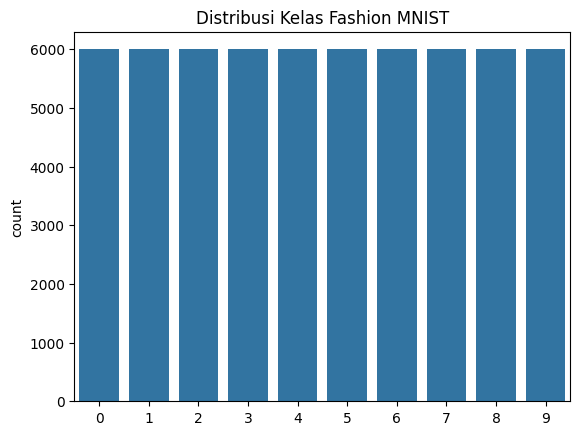

In [ ]:
sns.countplot(x=y_train)
plt.title("Distribusi Kelas Fashion MNIST")
plt.show()

* Visualisasi bar chart untuk melihat distribusi jumlah data per kelas.

* Memastikan bahwa dataset cukup seimbang (jumlah data tiap kelas relatif sama).

**Cek nilai hilang/missing value:**

In [ ]:
print("Nilai hilang di x_train:", np.isnan(x_train).sum())

Nilai hilang di x_train: 0


# **3. Data Preparation**

**a. Normalisasi**

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

data pixel (0–255) dikonversi ke rentang [0, 1] agar training lebih stabil dan cepat.

**b. Reshape**

Mengubah 2D (28x28) menjadi 1D (784 fitur) agar bisa digunakan oleh ANN:

In [ ]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

 Citra 28x28 diubah menjadi vektor 1D dengan 784 elemen karena ANN menerima input berupa vektor.

 * Citra 28x28 adalah gambar item fashion (seperti sepatu atau baju) berukuran 28 piksel × 28 piksel. Karena ANN hanya menerima input berupa vektor (barisan angka), gambar diubah menjadi vektor sepanjang 784 angka (28 × 28).

**c. Penerapan Query Language dengan menggunakan Pandas Query (Query Language) untuk seleksi data**

pada tahap ini, semua data kelas diseleksi.

In [ ]:
df = pd.DataFrame(x_train)
df['label'] = y_train

print("Jumlah subset:", subset.shape)

Jumlah subset: (12000, 785)


**d. One-Hot Encoding Label**

Mengubah label numerik (0–9) menjadi vektor biner (untuk softmax output layer ANN).

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

Label numerik (contoh: 3) dikonversi menjadi vektor 10 dimensi: 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

Ini diperlukan karena output layer ANN menggunakan fungsi softmax, yang menghasilkan probabilitas untuk setiap kelas.

# **4. Modeling (ANN)**

* Model ANN dengan 3 layer utama:

  1. Dense(128) → hidden layer pertama

  2. Dense(64) → hidden layer kedua

  3. Dense(10) → output layer untuk 10 kelas

* ReLU: fungsi aktivasi non-linear yang efisien dan cepat.

* Dropout (0.2): mencegah overfitting dengan mengabaikan 20% neuron saat training.
* Loss function: categorical_crossentropy karena ini masalah klasifikasi multi-kelas.

* Optimizer: adam dipilih karena efisien dan adaptif.

* Training:

    * 10 epoch (putaran training)

    * 20% data training digunakan untuk validasi

    * batch size 128 → data diproses dalam kelompok

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  # 10 kelas
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Training
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=128, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6682 - loss: 0.9404 - val_accuracy: 0.8458 - val_loss: 0.4315
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8326 - loss: 0.4659 - val_accuracy: 0.8578 - val_loss: 0.3877
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8479 - loss: 0.4198 - val_accuracy: 0.8596 - val_loss: 0.3902
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8580 - loss: 0.3861 - val_accuracy: 0.8732 - val_loss: 0.3559
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8694 - loss: 0.3658 - val_accuracy: 0.8742 - val_loss: 0.3449
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8725 - loss: 0.3472 - val_accuracy: 0.8748 - val_loss: 0.3491
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8776 - loss: 0.3367 - val_accuracy: 0.8804 - val_loss: 0.3290
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8815 - loss: 0.3224 - val_accuracy: 0

# **5. Evaluation**

Prediksi:

* Prediksi: Model menghasilkan probabilitas, lalu diubah ke kelas dengan argmax.
    * argmax adalah fungsi yang mengambil nilai tertinggi dari hasil prediksi. ANN menghasilkan 10 angka (probabilitas tiap kelas), dan argmax menentukan kelas dengan nilai tertinggi sebagai hasil prediksi.

* Confusion Matrix: Menampilkan prediksi vs. ground truth secara visual.

* Visualisasi hasil prediksi dalam bentuk confusion matrix.

* Menampilkan precision, recall, dan f1-score untuk masing-masing kelas.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


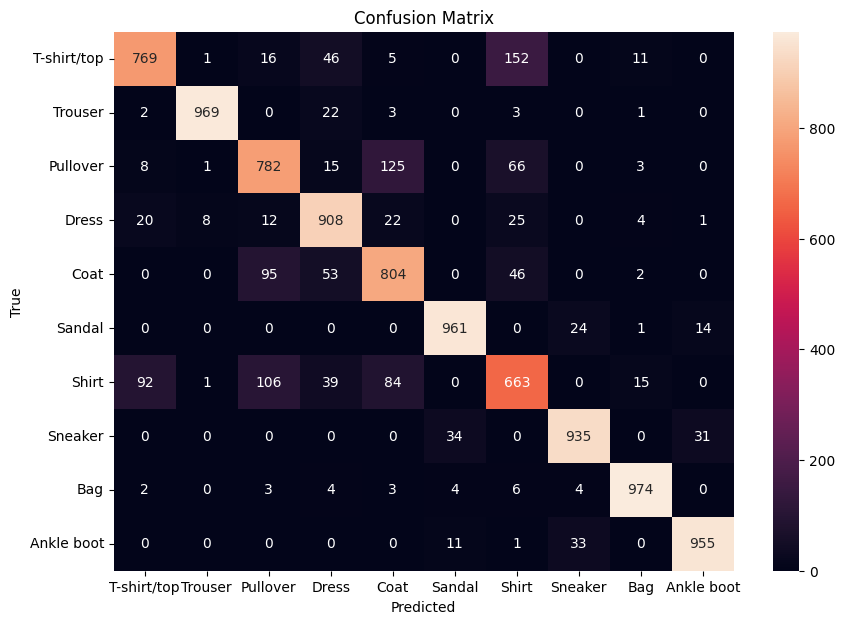

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.77      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.77      0.78      0.78      1000
       Dress       0.84      0.91      0.87      1000
        Coat       0.77      0.80      0.79      1000
      Sandal       0.95      0.96      0.96      1000
       Shirt       0.69      0.66      0.68      1000
     Sneaker       0.94      0.94      0.94      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Prediksi
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Report klasifikasi
print(classification_report(y_test, y_pred_classes, target_names=label_map.values()))

# Kesimpulan

1. Model ANN mencapai akurasi 87%, performanya cukup baik untuk dataset Fashion MNIST.

2. Model bekerja sangat baik pada kelas seperti Trouser, Sandal, Sneaker, dan Bag.

3. Kesalahan utama terjadi pada kelas Shirt, yang sering tertukar dengan T-shirt dan Pullover karena bentuknya mirip.

3. Confusion matrix membantu melihat di mana model salah, dan bisa dijadikan dasar untuk meningkatkan model, misalnya dengan menggunakan CNN untuk mengenali fitur visual lebih dalam.

In [ ]:
model.save('final_model.h5')